# 대선자료 시각화

In [1]:
# 모듈 불러오기
import pandas as pd

In [2]:
# Data 불러오기
election = pd.read_csv('../Data/election_2022.csv')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [3]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4사분위수 , 최대값 등등 
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


> 통계학적으로 이재명이 전체적으로 다 낮다. 특정 지역에서만 표를 많이 받음, 그냥 완패 임

In [4]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [5]:
# demension 확인하기
election.shape # ( row , column )

(248, 7)

In [6]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [7]:
# 전체 컬럼에서 NaN 확인
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [8]:
# electionSum 컬럼 만들기 : 이재명 + 윤석열 + 심상정
election['electionSum'] = election.iloc[: , 4:7].sum(axis=1) # election.loc[: , '이재명':'심상정'].sum(axis=1)
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727
...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196
244,경상남도,거창군,53049,41399,11963,27254,895,40112
245,경상남도,합천군,39768,31270,6911,22742,511,30164
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786


In [9]:
# electionRatio 컬럼 만들기 : electionSum / 투표수 * 100 , 반올림 소수점 2자리
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100  , 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [10]:
# csv 로 저장하기
election.to_csv('../Data/election_2022_1st.csv' , index=False)

---
# 광역시별 투표율을 Pie Chart로 표현하기
투표수 컬럼만 사용

In [11]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [152]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

> \

In [13]:
# 그룹핑
elec_group = election.groupby('광역시도').sum()
# 투표수를 내림차순으로 정렬
elec_group = elec_group.투표수.sort_values(ascending = False)
type(elec_group)

pandas.core.series.Series

> 피벗테이블 쓰는게 더 좋다@!

In [14]:
# 피벗테이블
elec_pivot = election.pivot_table(index = ['광역시도'], values = ['투표수'] , aggfunc = sum )
# 투표수를 내림차순으로 정렬
elec_pivot = elec_pivot.sort_values(by= '투표수' , ascending= False)
type(elec_pivot)

pandas.core.frame.DataFrame

In [15]:
plt.style.use('default')
plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 깨짐 해결

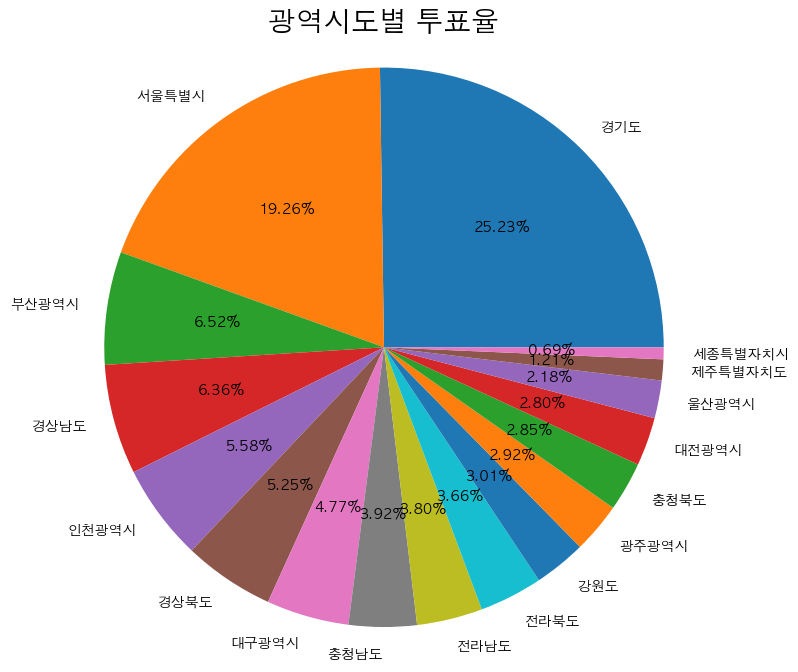

In [16]:
# 파이차트 그리기 # Series
elec_group.plot(
    kind = 'pie',
    figsize = (9,8),
    autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
)

plt.title('광역시도별 투표율' , size = 20)
plt.axis('equal') # 약간 찌그러지게 나오는 파이차트를 원으로 만드는 옵션
plt.ylabel('') # ylabel 없앰
plt.show()


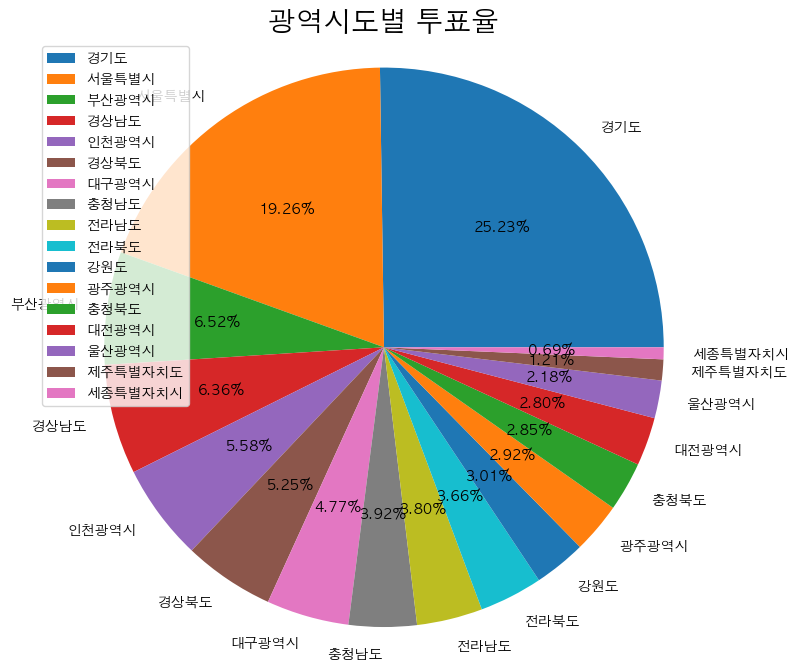

In [17]:
# 파이차트 그리기 # DataFrame

elec_pivot.plot(
    kind = 'pie',
    figsize = (9,8),
    autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
    startangle = 0, # 시작 각도
    legend = True, # 기본으로 뜨더라
    # y = '투표수', # DataFrame으로 pie그리려면 써야함 (둘 중 하나)
    subplots = True , # DataFrame으로 pie그리려면 써야함 (둘 중 하나)
)

# elec_pivot.투표수.plot(
#     kind = 'pie',
#     figsize = (9,8),
#     autopct = '%.2f%%', # autopercent , 뒤에 %% 를 붙여줘야 그래프에 % 기호가 표시된다. 
#     startangle = 0, # 시작 각도
# )

plt.title('광역시도별 투표율' , size = 20)
plt.axis('equal') # 약간 찌그러지게 나오는 파이차트를 원으로 만드는 옵션
plt.ylabel('') # ylabel 없앰
plt.show()


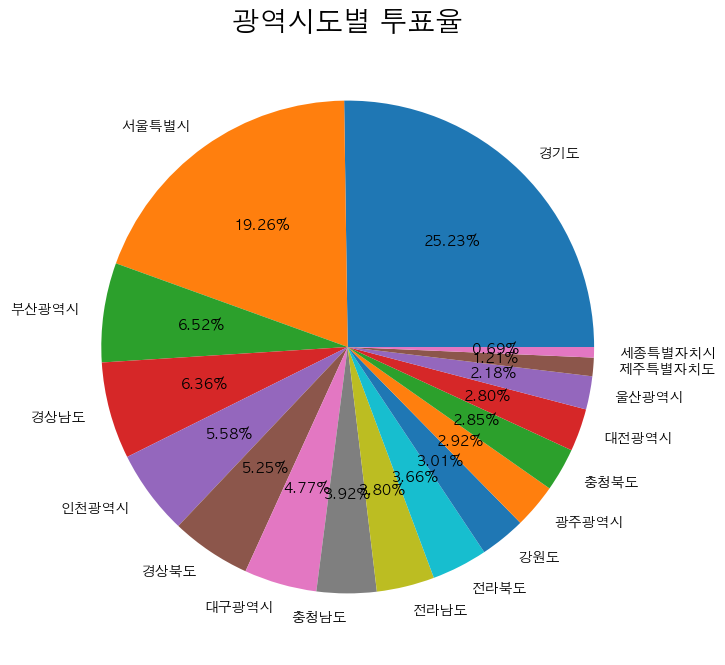

In [18]:
# 강사님 풀이
data = elec_pivot.투표수
categories = list(elec_pivot.index)

plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10

plt.pie(
    data,
    labels=categories,
    autopct="%.2f%%",
)
plt.title('광역시도별 투표율' , size = 20)
plt.show()

### 윤석열 후보의 광역시도별 득표율 

In [19]:
# 피벗테이블
yoon_pivot = election.pivot_table(index = ['광역시도'], values = ['윤석열'] , aggfunc = sum )
# # 투표수를 내림차순으로 정렬
yoon_pivot = yoon_pivot.sort_values(by= '윤석열' , ascending= False)
yoon_pivot

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


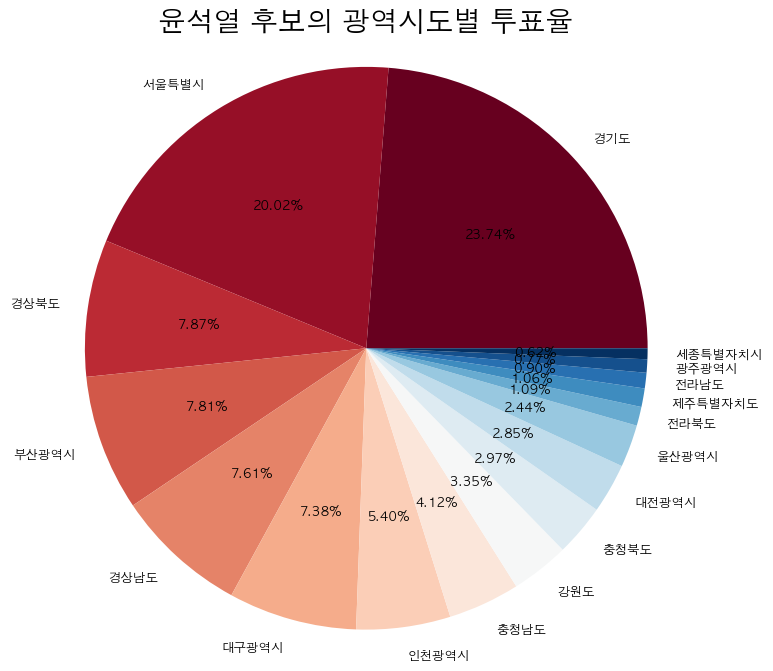

In [20]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 9

yoon_pivot.윤석열.plot(
    kind = 'pie',
    autopct="%.2f%%",
    cmap = 'RdBu'
)
plt.title('윤석열 후보의 광역시도별 투표율' , size = 20)
plt.ylabel('')
plt.axis('equal') 
plt.show()

### 윤석열 후보의 서울 득표 TOP 5

In [21]:
# ver 1
elec_seoul = election.loc[election['광역시도'] == '서울특별시']
elec_seoul = elec_seoul.set_index('시군구')
top5 = elec_seoul.sort_values(by = '윤석열' , ascending = False)[ :5]
top5 = top5.loc[:,'윤석열']
top5 # top5 뽑기

etc = elec_seoul.sort_values(by = '윤석열' , ascending = False)[ 5:].sum(axis=0)
etc = etc['윤석열'] # 나머지 뽑기

ind = list(top5.index)
ind.append('기타')
ind # 인덱스 만들기

top = list(top5.values)
top.append(etc)
top # 수치 만들기 

df = pd.Series(top , index = ind)
df

송파구     255166
강남구     235897
강서구     181510
서초구     179472
노원구     163340
기타     2240362
dtype: int64

In [22]:
# ver 2
elec_seoul = election.loc[election['광역시도'] == '서울특별시']
elec_seoul = elec_seoul.set_index('시군구')
elec_seoul = elec_seoul.sort_values(by = '윤석열' , ascending = False) # [ :5]
top5 = elec_seoul.loc[: , '윤석열'].head()
etc = elec_seoul.loc['강동구': , '윤석열'].sum(axis=0)
top5.loc['기타'] = etc
top5

시군구
송파구     255166
강남구     235897
강서구     181510
서초구     179472
노원구     163340
기타     2240362
Name: 윤석열, dtype: int64

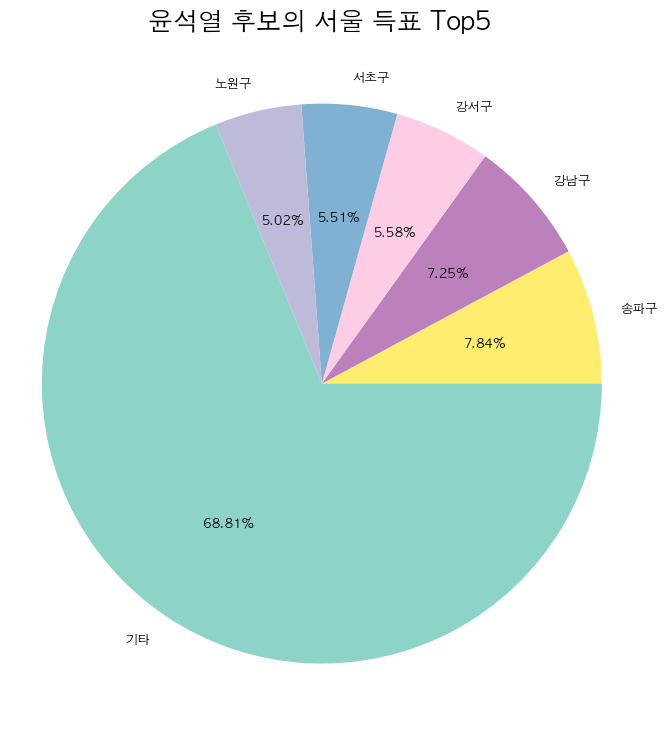

In [23]:
plt.rcParams['figure.figsize'] = (8,9)
plt.rcParams['font.size'] = 9

df.plot(
    kind = 'pie',
    autopct="%.2f%%",
    cmap = 'Set3_r'
)
plt.title('윤석열 후보의 서울 득표 Top5' , size = 18)
plt.ylabel('')
plt.axis('equal') 
plt.show()

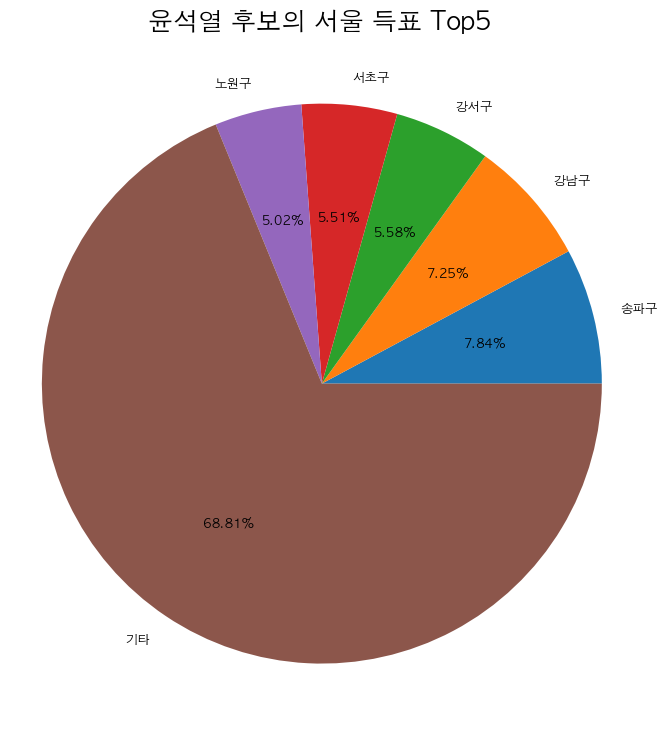

In [24]:
plt.rcParams['figure.figsize'] = (8,9)
plt.rcParams['font.size'] = 9

plt.pie(
    top5,
    labels= top5.index,
    autopct="%.2f%%",
)

plt.title('윤석열 후보의 서울 득표 Top5' , size = 18)
plt.ylabel('')
plt.axis('equal') 
plt.show()

---

### 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구

In [72]:
elec_sung = election.loc[election['시군구'] == '성북구' , ['시군구','투표수','윤석열','이재명','심상정']]
elec_sung = elec_sung.set_index('시군구').T
elec_sung.loc['기타'] = elec_sung.loc['투표수' , '성북구']- elec_sung.loc['윤석열':'심상정' , '성북구'].sum()
elec_sung = elec_sung[1:]
elec_sung


시군구,성북구
윤석열,135044
이재명,142702
심상정,8952
기타,5489


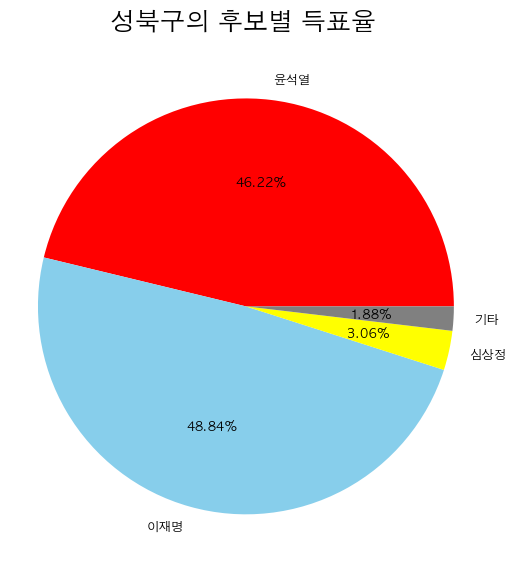

In [93]:
plt.rcParams['figure.figsize'] = (6,7)
plt.rcParams['font.size'] = 9

elec_sung['성북구'].plot(
    kind = 'pie',
    autopct="%.2f%%",
    colors = ['red' , 'skyblue' ,'yellow','grey']
)
plt.title('성북구의 후보별 득표율' , size = 18)
plt.ylabel('')
plt.axis('equal') 
plt.show()

In [95]:
# 강사님 풀이 
pob_윤석열 = election.loc[election['시군구'] == '성북구']
pob_윤석열

pob_윤석열_data = pd.Series([int(pob_윤석열['윤석열']) , int(pob_윤석열['이재명']),int(pob_윤석열['심상정'])]).\
    append(pob_윤석열['투표수'] - pob_윤석열['electionSum']).reset_index(drop=True)
pob_윤석열_data

0    135044
1    142702
2      8952
3      5489
dtype: int64

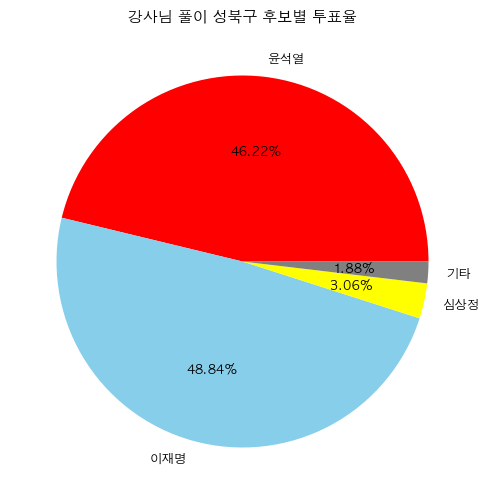

In [101]:
plt.pie(
    pob_윤석열_data,
    labels= ['윤석열','이재명','심상정','기타'],
    autopct= '%.2f%%',
    colors= ['red' ,'#87CEEB','yellow','grey']
)
plt.title('강사님 풀이 성북구 후보별 투표율')
plt.show()

--- 
### 투표수가 가장 많은 4지역(광역시도) 의 각 후보별 득표수를 막대그래프로 표현하기

In [276]:
election
# 피벗테이블
top_광역시 = election.pivot_table(index = ['광역시도'], values = ['투표수','윤석열','이재명','심상정'] , aggfunc = sum )
# # 투표수를 내림차순으로 정렬
top_광역시 = top_광역시.sort_values(by = '투표수' , ascending= False)
top_광역시_4 = top_광역시.iloc[:,[1,2,0]].head(4)
top_광역시_4

,윤석열,이재명,심상정
광역시도,,,
경기도,3859666,4297931,201113
서울특별시,3255747,2944981,180324
부산광역시,1270072,831896,47541
경상남도,1237346,794130,52591


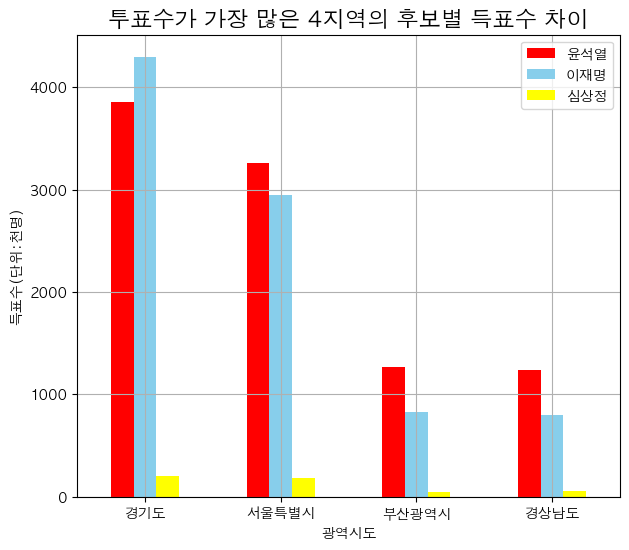

In [164]:
(top_광역시_4/1000).plot(
    kind = 'bar',
    figsize = (7,6),
    color = ['red','skyblue','yellow'],
    grid = True,
)

plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이' , size = 16)
plt.ylabel('득표수(단위:천명)')
plt.xticks(rotation = 0)
plt.show()

In [121]:
import seaborn as sns

In [306]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'AppleGothic'

In [335]:
# sea_top4 = top_광역시_4.reset_index()
sea_top4 = top_광역시_4.T
print(sea_top4)
# sea_top4.loc[:,'후보'] = ['윤석열','이재명','심상정']
경기도 = sea_top4.iloc[:,[0]].reset_index()
경기도['지역'] = '경기도'
경기도.columns = ['후보', '투표수' , '지역']
서울특별시 = sea_top4.iloc[:,[1]].reset_index()
서울특별시['지역'] = '서울특별시'
서울특별시.columns = ['후보', '투표수' , '지역']
부산광역시 = sea_top4.iloc[:,[2]].reset_index()
부산광역시['지역'] = '부산광역시'
부산광역시.columns = ['후보', '투표수' , '지역']
경상남도 = sea_top4.iloc[:,[2]].reset_index()
경상남도['지역'] = '경상남도'
경상남도.columns = ['후보', '투표수' , '지역']

snstop4 = 경기도.append([서울특별시 , 부산광역시 , 경상남도])
snstop4['투표수'] =  snstop4['투표수']/1000
snstop4

광역시도      경기도    서울특별시    부산광역시     경상남도
윤석열   3859666  3255747  1270072  1237346
이재명   4297931  2944981   831896   794130
심상정    201113   180324    47541    52591


,후보,투표수,지역
0,윤석열,3859.666,경기도
1,이재명,4297.931,경기도
2,심상정,201.113,경기도
0,윤석열,3255.747,서울특별시
1,이재명,2944.981,서울특별시
2,심상정,180.324,서울특별시
0,윤석열,1270.072,부산광역시
1,이재명,831.896,부산광역시
2,심상정,47.541,부산광역시
0,윤석열,1270.072,경상남도


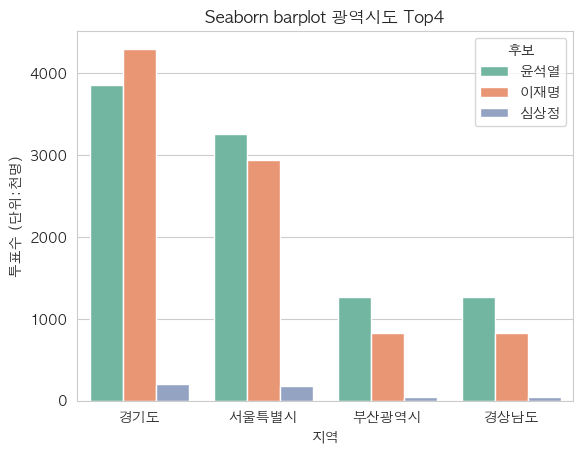

In [317]:
sns.barplot(
    data = snstop4,
    x = '지역', 
    y = '투표수',
    hue = '후보',
    palette= 'Set2'
)

plt.title('Seaborn barplot 광역시도 Top4')
plt.ylabel('투표수 (단위:천명)')
plt.show()

---
### 투표수가 높은 5군데 시군구의 후보별 득표수

In [329]:
election['시군'] = election['광역시도'] + ' ' + election['시군구']
election
# 피벗테이블
top_시군구 = election.pivot_table(index = ['시군'], values = ['투표수','윤석열','이재명','심상정'] , aggfunc = sum )
# 투표수를 내림차순으로 정렬
top_시군구 = top_시군구.sort_values(by = '투표수' , ascending= False)
top_시군구_5 = top_시군구.iloc[:,[1,2,0]].head(5)
print(top_시군구_5)

#--------강사님 풀이 참고 다시해봄
re_top_시군구_5 =  election.sort_values(by = '투표수' , ascending= False).loc[:,['윤석열','이재명','심상정','시군']].set_index('시군').head(5)
print(re_top_시군구_5)

              윤석열     이재명    심상정
시군                              
경기도 화성시    236055  283324  12955
경기도 부천시    224331  285227  13249
경기도 남양주시   203075  239179  10089
서울특별시 송파구  255166  180490  10652
서울특별시 강서구  181510  190000  11100
              윤석열     이재명    심상정
시군                              
경기도 화성시    236055  283324  12955
경기도 부천시    224331  285227  13249
경기도 남양주시   203075  239179  10089
서울특별시 송파구  255166  180490  10652
서울특별시 강서구  181510  190000  11100


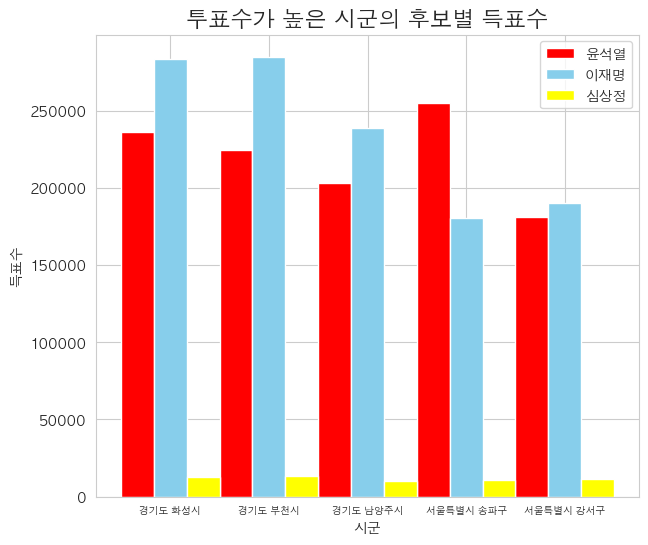

In [341]:
top_시군구_5.plot(
    kind = 'bar',
    figsize = (7,6),
    color = ['red','skyblue','yellow'],
    grid = True,
    width = 1.0 # 폭 1.0은 틈없이 붙은 정도 , 더 커지면 겹쳐짐 작아지면 멀어지고 얇아짐
)

plt.title('투표수가 높은 시군의 후보별 득표수' , size = 16)
plt.ylabel('득표수')
plt.xticks(rotation = 0 , size = 7)
 
plt.show()

분석에서는 코드를 한줄로 작성한다.

---